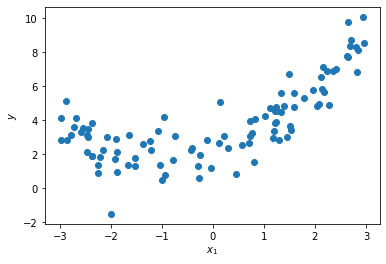

In [5]:
import matplotlib.pyplot as plt
import numpy as np

m = 100
X = 6*np.random.rand(m, 1) - 3
y = 0.5*X**2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.show()

In [10]:
from sklearn.preprocessing import PolynomialFeatures
# polynomial feature calss is for transforming training data into something a linear reg algo can handle
# adding the squares or higher order versions of each feature as new features in training set

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# as you can see, there's another feature which is the square of 2.8...
X_poly[0]

# polynomial regression is capable of finding relationships between features, this includes combinations
# such as diff ways to multiply the features and their higher order versions

# poly features transforms array into combinations, beware of combinatorial explosion of the number of features!



array([-2.86633638,  8.21588422])

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

# we can check a models generalization performance using either cross-validation or learning curves


(array([2.20620093]), array([[0.90011173, 0.45589292]]))

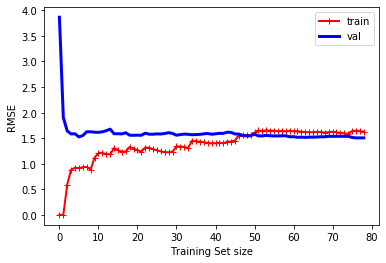

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# plots of the model's performance on the trainin and val set as a function of the set size (or train iteration)

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    # training in different batch sizes ata for this loop
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict =  model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend()
    plt.xlabel("Training Set size")
    plt.ylabel("RMSE")
    
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

# the curve that we get here is typical of an underfitting model
# if your model is underfitting the training data, adding more will not help
# you need to use a more complex model or come up with better features

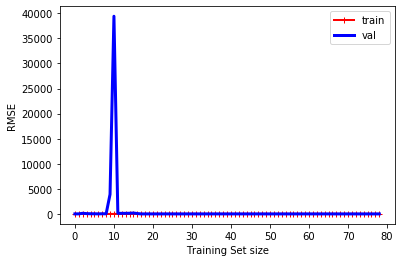

In [15]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)
# overfitting since training is performing better, but one way to improve overfit is feeding more training data

In [ ]:
# Ridge Regression, Lasso Regression, Elastic Net are 3 diff ways to constrain weights (regularization)
# 